In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

## Load Results

In [2]:
mem_lens = [400, 1600]

### <span style='background :yellow' > 1st target sentence </span>

In [3]:
run_nums = 10
bin_nums = 6
trg_sent_nums = 5

for mem_len in mem_lens:

    # Uninterruped
    PPL_TXL_uninterrupted = pd.read_csv(f"results/TXL-{mem_len}/Uninterrupted/UninterruptedPPL_tXL_APAMarriageArticle_FixLenWin_1024.csv")

    PPL_TXL_base = np.array(PPL_TXL_uninterrupted['PPL_base'][1:])
    PPL_TXL_w_context_uninterrupted = np.array(PPL_TXL_uninterrupted['PPL_w_context_uninterr'][1:])
    TXL_sents_article = np.array(PPL_TXL_uninterrupted['target_sent'][1:])

    PPL_TXL_w_context_to_base_uninterrupted = np.divide(PPL_TXL_w_context_uninterrupted, PPL_TXL_base)

    # Interrupted 1st

    exec(f"diff_PPL_intrp_all_runs_{mem_len} = []")
    exec(f"sim_intrp_all_runs_{mem_len} = []")
    exec(f"PPL_base_all_runs_{mem_len} = []")
    exec(f"PPL_w_context_all_runs_{mem_len} = []")
    exec(f"PPL_intrp_all_runs_{mem_len} = []")

    exec(f"TXL_diff_PPL_intrp_all_runs_bin1_{mem_len} = []")
    exec(f"TXL_diff_PPL_intrp_all_runs_bin2_{mem_len} = []")
    exec(f"TXL_diff_PPL_intrp_all_runs_bin3_{mem_len} = []")
    exec(f"TXL_diff_PPL_intrp_all_runs_bin4_{mem_len} = []")
    exec(f"TXL_diff_PPL_intrp_all_runs_bin5_{mem_len} = []")
    exec(f"TXL_diff_PPL_intrp_all_runs_bin6_{mem_len} = []")

    exec(f"sim_intrp_all_runs_bin1_{mem_len} = []")
    exec(f"sim_intrp_all_runs_bin2_{mem_len} = []")
    exec(f"sim_intrp_all_runs_bin3_{mem_len} = []")
    exec(f"sim_intrp_all_runs_bin4_{mem_len} = []")
    exec(f"sim_intrp_all_runs_bin5_{mem_len} = []")
    exec(f"sim_intrp_all_runs_bin6_{mem_len} = []")

    exec(f"PPL_base_all_runs_bin_{mem_len} = []")
    exec(f"PPL_w_context_all_runs_bin_{mem_len} = []")

    exec(f"PPL_intrp_all_runs_bin1_{mem_len} = []")
    exec(f"PPL_intrp_all_runs_bin2_{mem_len} = []")
    exec(f"PPL_intrp_all_runs_bin3_{mem_len} = []")
    exec(f"PPL_intrp_all_runs_bin4_{mem_len} = []")
    exec(f"PPL_intrp_all_runs_bin5_{mem_len} = []")
    exec(f"PPL_intrp_all_runs_bin6_{mem_len} = []")

    for counter_run in range(1, run_nums+1):

        if counter_run == 8:
            continue
        
        PPL_TXL_data_run = pd.read_excel(f"results/TXL-{mem_len}/Interrupted/bins-4-sents/PPL_tXL_results_4sents_6bins_APA_marriage_FixLenWin_1024_seed_"+str(counter_run)+".xlsx")
                
        for counter_trg_sent in range(trg_sent_nums):
            
            target_sent = ast.literal_eval(PPL_TXL_data_run['target_sent'][counter_trg_sent])[0] 
            PPL_intrp_target_sent_all_bins = ast.literal_eval(PPL_TXL_data_run['ppl_intrp_target_all_bins'][counter_trg_sent])
            sim_intrp_all_bins = np.mean(np.array(ast.literal_eval(PPL_TXL_data_run['sim_intrp_all_bins'][counter_trg_sent])), 1)
            
            ind_target_sent_unintrp = np.where(TXL_sents_article == target_sent)
            
            PPL_base_target_sent = PPL_TXL_base[ind_target_sent_unintrp]
            PPL_w_context_target_sent = PPL_TXL_w_context_uninterrupted[ind_target_sent_unintrp]
            
            PPL_w_context_to_base_target_sent = np.divide(PPL_w_context_target_sent, PPL_base_target_sent)
            PPL_intrp_to_base_target_sent_all_bins = np.divide(PPL_intrp_target_sent_all_bins, PPL_base_target_sent)    

            diff_PPL_intrp = PPL_intrp_to_base_target_sent_all_bins - PPL_w_context_to_base_target_sent

            
            ## exclusion criteria ##
            trg_exclude_1 = '<|endoftext|>"Money is the No.'
            trg_exclude_2 = '<|endoftext|>1 source of conflict or tension," she says.'

            if target_sent == trg_exclude_1 or target_sent == trg_exclude_2:
                print('skipped')
                continue
                
            else:
                
                exec(f"diff_PPL_intrp_all_runs_{mem_len}.append(diff_PPL_intrp)")
                exec(f"sim_intrp_all_runs_{mem_len}.append(sim_intrp_all_bins)")
                
                exec(f"PPL_base_all_runs_{mem_len}.append([PPL_base_target_sent]*bin_nums)")
                exec(f"PPL_w_context_all_runs_{mem_len}.append([PPL_w_context_target_sent]*bin_nums)")
                exec(f"PPL_intrp_all_runs_{mem_len}.append(PPL_intrp_target_sent_all_bins)")
                
                for counter_bin in range(1, bin_nums+1):
                    
                    exec(f'PPL_intrp_all_runs_bin{counter_bin}_{mem_len}.append(PPL_intrp_target_sent_all_bins[counter_bin-1])')
                    exec(f'sim_intrp_all_runs_bin{counter_bin}_{mem_len}.append(sim_intrp_all_bins[counter_bin-1])')
                    exec(f'TXL_diff_PPL_intrp_all_runs_bin{counter_bin}_{mem_len}.append(diff_PPL_intrp[counter_bin-1])')
                    
                exec(f"PPL_base_all_runs_bin_{mem_len}.append(PPL_base_target_sent)")
                exec(f"PPL_w_context_all_runs_bin_{mem_len}.append(PPL_w_context_target_sent)")
                
    exec(f"TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_{mem_len} = np.array(diff_PPL_intrp_all_runs_{mem_len}).flatten()")
    exec(f"TXL_4sents_1stTarget_sim_intrp_all_runs_flatten_{mem_len} = np.array(sim_intrp_all_runs_{mem_len}).flatten()")
    exec(f"TXL_4sents_1stTarget_PPL_base_all_runs_flatten_{mem_len} = np.array(PPL_base_all_runs_{mem_len}).flatten()")
    exec(f"TXL_4sents_1stTarget_PPL_w_context_all_runs_flatten_{mem_len} = np.array(PPL_w_context_all_runs_{mem_len}).flatten()")
    exec(f"TXL_4sents_1stTarget_PPL_intrp_all_runs_flatten_{mem_len} = np.array(PPL_intrp_all_runs_{mem_len}).flatten()")

skipped
skipped
skipped
skipped


### <span style='background :yellow' > 2nd & 3rd target sentence </span>

In [4]:
run_nums = 5
bin_nums = 6
trg_sent_nums = 5

for mem_len in mem_lens:

    diff_PLL_intrp_all_runs = []
    sim_intrp_all_runs = []
    PPL_base_all_runs = []
    PPL_w_context_all_runs = []
    PPL_intrp_all_runs = []

    TXL_diff_PLL_intrp_all_runs_bin1 = []
    TXL_diff_PLL_intrp_all_runs_bin2 = []
    TXL_diff_PLL_intrp_all_runs_bin3 = []
    TXL_diff_PLL_intrp_all_runs_bin4 = []
    TXL_diff_PLL_intrp_all_runs_bin5 = []
    TXL_diff_PLL_intrp_all_runs_bin6 = []

    sim_intrp_all_runs_bin1 = []
    sim_intrp_all_runs_bin2 = []
    sim_intrp_all_runs_bin3 = []
    sim_intrp_all_runs_bin4 = []
    sim_intrp_all_runs_bin5 = []
    sim_intrp_all_runs_bin6 = []

    PPL_base_all_runs_bin = []
    PPL_w_context_all_runs_bin = []

    PPL_intrp_all_runs_bin1 = []
    PPL_intrp_all_runs_bin2 = []
    PPL_intrp_all_runs_bin3 = []
    PPL_intrp_all_runs_bin4 = []
    PPL_intrp_all_runs_bin5 = []
    PPL_intrp_all_runs_bin6 = []

    for counter_run in range(1, run_nums+1):
        
        PPL_TXL_data_run = pd.read_excel(f"results/TXL-{mem_len}/Interrupted/bins-4-sents/PPL_tXL_results_4sentsIntrp_MultipleTargets_2nd3rd_Debugged_v2_6bins_APA_marriage_FixLenWin_1024_seed_"+str(counter_run)+".xlsx")
                
        for counter_trg_sent in range(trg_sent_nums):
            
            target_sent_1st = ast.literal_eval(PPL_TXL_data_run['target_sent_1st'][counter_trg_sent])[0] 
            target_sent_2nd = ast.literal_eval(PPL_TXL_data_run['target_sent_2nd'][counter_trg_sent])[0] 
            target_sent_3rd = ast.literal_eval(PPL_TXL_data_run['target_sent_3rd'][counter_trg_sent])[0] 
            
            PPL_intrp_target_sent_2nd_all_bins = ast.literal_eval(PPL_TXL_data_run['ppl_intrp_2ndtarget_all_bins'][counter_trg_sent])
            sim_intrp_all_bins = ast.literal_eval(PPL_TXL_data_run['sim_intrp_all_bins'][counter_trg_sent]) 
            
            ind_target_sent_2nd_unintrp = np.where(TXL_sents_article == target_sent_2nd)
            
            PPL_base_target_sent_2nd = PPL_TXL_base[ind_target_sent_2nd_unintrp]
            PPL_w_context_target_sent_2nd = PPL_TXL_w_context_uninterrupted[ind_target_sent_2nd_unintrp]
            
            PPL_w_context_to_base_target_sent_2nd = np.divide(PPL_w_context_target_sent_2nd, PPL_base_target_sent_2nd)
            PPL_intrp_to_base_target_sent_2nd_all_bins = np.divide(PPL_intrp_target_sent_2nd_all_bins, PPL_base_target_sent_2nd)    

            diff_PPL_intrp = PPL_intrp_to_base_target_sent_2nd_all_bins - PPL_w_context_to_base_target_sent_2nd

            
            ## exclusion criteria ##
            trg_exclude_1 = '<|endoftext|>"Money is the No.'
            trg_exclude_2 = '<|endoftext|>1 source of conflict or tension," she says.'

            if target_sent_1st == trg_exclude_1 or target_sent_1st == trg_exclude_2:
                print('skipped')
                continue
                
            elif target_sent_2nd == trg_exclude_1 or target_sent_2nd == trg_exclude_2:
                print('skipped')
                continue
                
            elif target_sent_3rd == trg_exclude_1 or target_sent_3rd == trg_exclude_2:
                print('skipped')
                continue
                
            else:
                
                diff_PLL_intrp_all_runs.append(diff_PPL_intrp)
                sim_intrp_all_runs.append(sim_intrp_all_bins)
                
                PPL_base_all_runs.append([PPL_base_target_sent_2nd]*bin_nums)
                PPL_w_context_all_runs.append([PPL_w_context_target_sent_2nd]*bin_nums)
                PPL_intrp_all_runs.append(PPL_intrp_target_sent_2nd_all_bins)
                
                for counter_bin in range(1, bin_nums+1):
                    
                    exec(f'PPL_intrp_all_runs_bin{counter_bin}.append(PPL_intrp_target_sent_2nd_all_bins[counter_bin-1])')
                    exec(f'sim_intrp_all_runs_bin{counter_bin}.append(sim_intrp_all_bins[counter_bin-1])')
                    exec(f'TXL_diff_PLL_intrp_all_runs_bin{counter_bin}.append(diff_PPL_intrp[counter_bin-1])')
                    
                PPL_base_all_runs_bin.append(PPL_base_target_sent_2nd)
                PPL_w_context_all_runs_bin.append(PPL_w_context_target_sent_2nd)
                
    exec(f"TXL_4sents_2ndTarget_diff_PPL_intrp_all_runs_flatten_{mem_len} = np.array(diff_PLL_intrp_all_runs).flatten()")
    exec(f"TXL_4setns_2ndTarget_sim_intrp_all_runs_flatten_{mem_len} = np.array(sim_intrp_all_runs).flatten()")
    exec(f"TXL_4sents_2ndTarget_PPL_base_all_runs_flatten_{mem_len} = np.array(PPL_base_all_runs).flatten()")
    exec(f"TXL_4sents_2ndTarget_PPL_w_context_all_runs_flatten_{mem_len} = np.array(PPL_w_context_all_runs).flatten()")
    exec(f"TXL_4sents_2ndTarget_PPL_intrp_all_runs_flatten_{mem_len} = np.array(PPL_intrp_all_runs).flatten()")

    run_nums = 5
    bin_nums = 6
    trg_sent_nums = 5

    diff_PLL_intrp_all_runs = []
    sim_intrp_all_runs = []
    PPL_base_all_runs = []
    PPL_w_context_all_runs = []
    PPL_intrp_all_runs = []

    TXL_diff_PLL_intrp_all_runs_bin1 = []
    TXL_diff_PLL_intrp_all_runs_bin2 = []
    TXL_diff_PLL_intrp_all_runs_bin3 = []
    TXL_diff_PLL_intrp_all_runs_bin4 = []
    TXL_diff_PLL_intrp_all_runs_bin5 = []
    TXL_diff_PLL_intrp_all_runs_bin6 = []

    sim_intrp_all_runs_bin1 = []
    sim_intrp_all_runs_bin2 = []
    sim_intrp_all_runs_bin3 = []
    sim_intrp_all_runs_bin4 = []
    sim_intrp_all_runs_bin5 = []
    sim_intrp_all_runs_bin6 = []

    PPL_base_all_runs_bin = []
    PPL_w_context_all_runs_bin = []

    PPL_intrp_all_runs_bin1 = []
    PPL_intrp_all_runs_bin2 = []
    PPL_intrp_all_runs_bin3 = []
    PPL_intrp_all_runs_bin4 = []
    PPL_intrp_all_runs_bin5 = []
    PPL_intrp_all_runs_bin6 = []

    for counter_run in range(1, run_nums+1):
        
        PPL_TXL_data_run = pd.read_excel(f"results/TXL-{mem_len}/Interrupted/bins-4-sents/PPL_tXL_results_4sentsIntrp_MultipleTargets_2nd3rd_Debugged_v2_6bins_APA_marriage_FixLenWin_1024_seed_"+str(counter_run)+".xlsx")
                
        for counter_trg_sent in range(trg_sent_nums):
            
            target_sent_1st = ast.literal_eval(PPL_TXL_data_run['target_sent_1st'][counter_trg_sent])[0] 
            target_sent_2nd = ast.literal_eval(PPL_TXL_data_run['target_sent_2nd'][counter_trg_sent])[0] 
            target_sent_3rd = ast.literal_eval(PPL_TXL_data_run['target_sent_3rd'][counter_trg_sent])[0] 
            
            PPL_intrp_target_sent_3rd_all_bins = ast.literal_eval(PPL_TXL_data_run['ppl_intrp_3rdtarget_all_bins'][counter_trg_sent])
            sim_intrp_all_bins = ast.literal_eval(PPL_TXL_data_run['sim_intrp_all_bins'][counter_trg_sent]) 
            
            ind_target_sent_3rd_unintrp = np.where(TXL_sents_article == target_sent_3rd)
            
            PPL_base_target_sent_3rd = PPL_TXL_base[ind_target_sent_3rd_unintrp]
            PPL_w_context_target_sent_3rd = PPL_TXL_w_context_uninterrupted[ind_target_sent_3rd_unintrp]
            
            PPL_w_context_to_base_target_sent_3rd = np.divide(PPL_w_context_target_sent_3rd, PPL_base_target_sent_3rd)
            PPL_intrp_to_base_target_sent_3rd_all_bins = np.divide(PPL_intrp_target_sent_3rd_all_bins, PPL_base_target_sent_3rd)    

            diff_PPL_intrp = PPL_intrp_to_base_target_sent_3rd_all_bins - PPL_w_context_to_base_target_sent_3rd

            
            ## exclusion criteria ##
            trg_exclude_1 = '<|endoftext|>"Money is the No.'
            trg_exclude_2 = '<|endoftext|>1 source of conflict or tension," she says.'

            if target_sent_1st == trg_exclude_1 or target_sent_1st == trg_exclude_2:
                print('skipped')
                continue
                
            elif target_sent_2nd == trg_exclude_1 or target_sent_2nd == trg_exclude_2:
                print('skipped')
                continue
                
            elif target_sent_3rd == trg_exclude_1 or target_sent_3rd == trg_exclude_2:
                print('skipped')
                continue
                
            else:
                
                diff_PLL_intrp_all_runs.append(diff_PPL_intrp)
                sim_intrp_all_runs.append(sim_intrp_all_bins)
                
                PPL_base_all_runs.append([PPL_base_target_sent_3rd]*bin_nums)
                PPL_w_context_all_runs.append([PPL_w_context_target_sent_3rd]*bin_nums)
                PPL_intrp_all_runs.append(PPL_intrp_target_sent_3rd_all_bins)
                
                for counter_bin in range(1, bin_nums+1):
                    
                    exec(f'PPL_intrp_all_runs_bin{counter_bin}.append(PPL_intrp_target_sent_3rd_all_bins[counter_bin-1])')
                    exec(f'sim_intrp_all_runs_bin{counter_bin}.append(sim_intrp_all_bins[counter_bin-1])')
                    exec(f'TXL_diff_PLL_intrp_all_runs_bin{counter_bin}.append(diff_PPL_intrp[counter_bin-1])')
                    
                PPL_base_all_runs_bin.append(PPL_base_target_sent_3rd)
                PPL_w_context_all_runs_bin.append(PPL_w_context_target_sent_3rd)
                
    exec(f"TXL_4sents_3rdTarget_diff_PPL_intrp_all_runs_flatten_{mem_len} = np.array(diff_PLL_intrp_all_runs).flatten()")
    exec(f"TXL_4sents_3rdTarget_sim_intrp_all_runs_flatten_{mem_len} = np.array(sim_intrp_all_runs).flatten()")
    exec(f"TXL_4sents_3rdTarget_PPL_base_all_runs_flatten_{mem_len} = np.array(PPL_base_all_runs).flatten()")
    exec(f"TXL_4sents_3rdTarget_PPL_w_context_all_runs_flatten_{mem_len} = np.array(PPL_w_context_all_runs).flatten()")
    exec(f"TXL_4sents_3rdTarget_PPL_intrp_all_runs_flatten_{mem_len} = np.array(PPL_intrp_all_runs).flatten()")

skipped
skipped
skipped
skipped


# Plots

### Correlation Plot

400 correlation coefficient: -0.051031503271548685


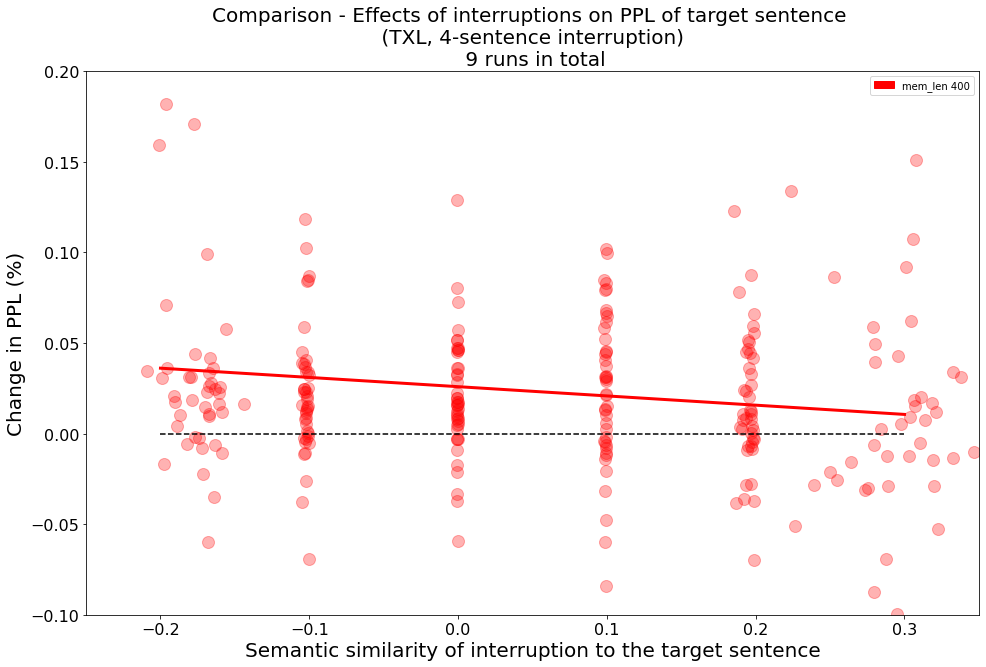

In [7]:
colors = {400:['r','r'], 1600:['royalblue', 'darkblue']}

fig, ax = plt.subplots(1, figsize=(16,10))
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

for mem_len in [1600]:
    c = colors[mem_len][0]
    c_line = colors[mem_len][1]
    exec(f"TXL_4sents_1stTarget_sim_intrp_all_runs_flatten = TXL_4sents_1stTarget_sim_intrp_all_runs_flatten_{mem_len}")
    exec(f"TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten = TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten_{mem_len}")
    reg_fit = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten.reshape(-1, 1), TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten.reshape(-1, 1))

    print(f'{mem_len} correlation coefficient: '+str(reg_fit.coef_[0][0]))

    ax.plot(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten, TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten, 'o', color = c, markersize= 12, alpha= 0.3)

    ax.set_ylabel('Change in PPL (%)', fontsize = 20)
    ax.set_xlabel('Semantic similarity of interruption to the target sentence', fontsize = 20)

    ax.set_title(f'Comparison - Effects of interruptions on PPL of target sentence \n (TXL, 4-sentence interruption) \n 9 runs in total', fontsize = 20)
    # ax.savefig('../Figures/comparing semantic similarity between passages_carver-SAT_carver-rainy day.png')
    #
    # ax.ylim([-0.05, 0.2])
    ax.set_xlim([-0.25, 0.35])
    ax.set_ylim([-0.1, 0.2])

    reg = LinearRegression().fit(TXL_4sents_1stTarget_sim_intrp_all_runs_flatten.reshape(-1,1), (TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten).reshape(-1,1))

    x_pred = np.linspace(-0.2, 0.3, len(TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten)).reshape(-1,1)
    y_pred = reg.predict(x_pred)

    ax.plot(x_pred, y_pred, linewidth = 3, color = c_line, label=f"mem_len {mem_len}")

    ax.plot(x_pred, [0]*len(x_pred), 'k--')

    # exec(f'plt.savefig("figures/Interruption_effect_TXL_4sentsIntrp_scatter_fit.pdf")')
    # exec(f'fig.savefig("figures/{mem_len}_Interruption_effect_TXL_4sentsIntrp_scatter_fit.png")')

red_patch = mpatches.Patch(color='red', label='mem_len 400')
blue_patch = mpatches.Patch(color='darkblue', label='mem_len 1600')
plt.legend(handles=[blue_patch])
plt.show()

### Distribution Plots

No handles with labels found to put in legend.


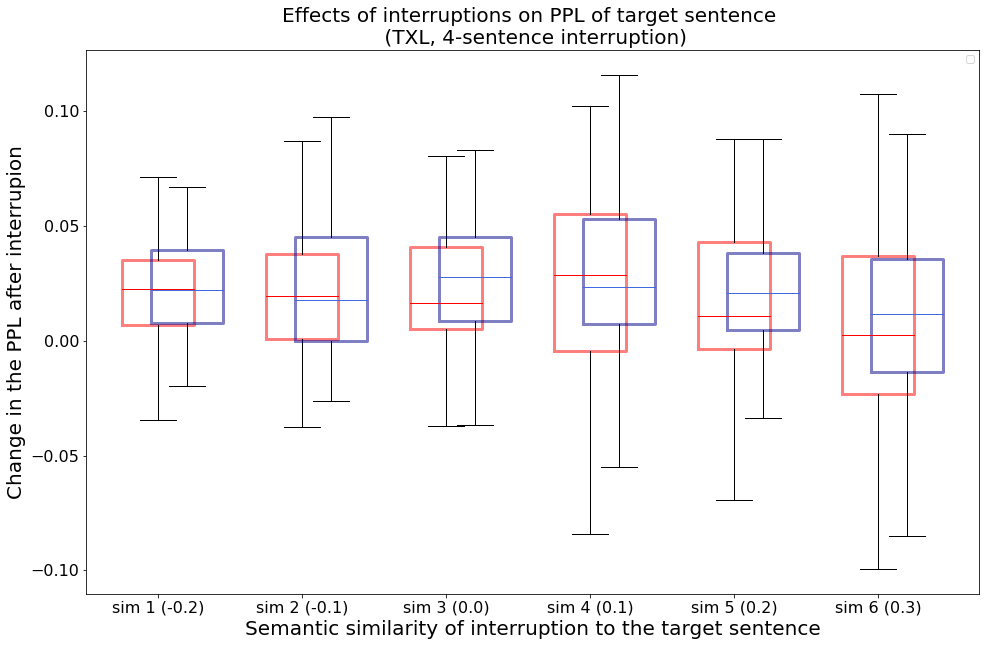

In [17]:
colors = {400:['r','r'], 1600:['royalblue', 'darkblue']}

fig, ax = plt.subplots(1, figsize=(16,10))
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

for i, mem_len in enumerate(mem_lens):
    c = colors[mem_len][0]
    c_line = colors[mem_len][1]

    boxprops = dict(color=c_line, linewidth=3, alpha=0.5)
    medianprops = dict(color=c)

    TXL_4sents_PPL_bins_concat = []

    for bin in np.arange(bin_nums)+1:    
        exec(f"TXL_4sents_PPL_bins_concat.append(TXL_diff_PPL_intrp_all_runs_bin{bin}_{mem_len})")
                            
    ax.boxplot(TXL_4sents_PPL_bins_concat, positions=np.arange(bin_nums)+1+0.2*i,showfliers=False, boxprops=boxprops, medianprops=medianprops)

    ax.set_ylabel('Change in the PPL after interrupion', fontsize = 20)
    ax.set_xlabel('Semantic similarity of interruption to the target sentence', fontsize = 20)

    ax.set_xticks([1, 2, 3, 4, 5, 6])
    ax.set_xticklabels(['sim 1 (-0.2)', 'sim 2 (-0.1)', 'sim 3 (0.0)', 'sim 4 (0.1)', 'sim 5 (0.2)', 'sim 6 (0.3)'])

    ax.set_title('Effects of interruptions on PPL of target sentence \n (TXL, 4-sentence interruption) \n 9 runs in total', fontsize = 20)
    # plt.savefig('../Figures/comparing semantic similarity between passages_carver-SAT_carver-rainy day.png')

    # plt.ylim([-0.04, 0.085])

    # exec(f'plt.savefig("Figures/Interruption_effect_LSTM_4sentsIntrp_6bins_boxplot.pdf")')
    # exec(f'plt.savefig("Figures/Interruption_effect_LSTM_4sentsIntrp_6bins_boxplot.png")')

red_patch = mpatches.Patch(color='red', label='mem_len 400')
blue_patch = mpatches.Patch(color='darkblue', label='mem_len 1600')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

## Multi Target Plots

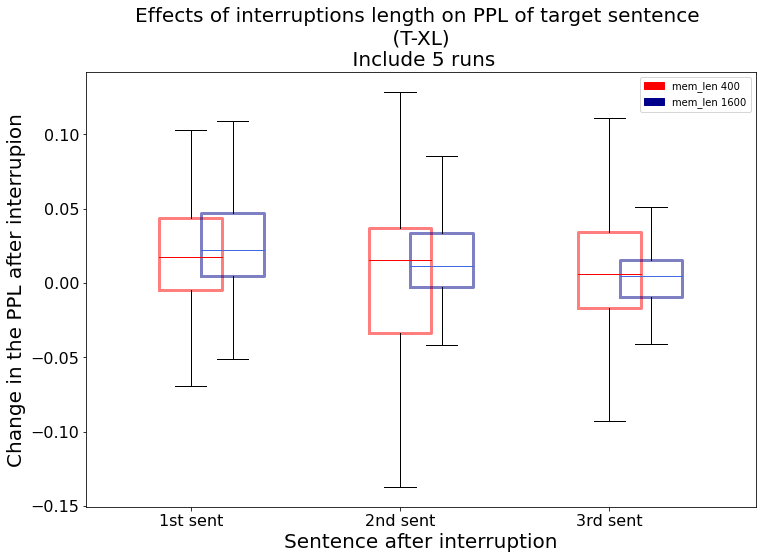

In [9]:
colors = {400:['r','r'], 1600:['royalblue', 'darkblue']}

fig, ax = plt.subplots(1, figsize=(12,8))
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

for i, mem_len in enumerate(mem_lens):
    
    c = colors[mem_len][0]
    c_line = colors[mem_len][1]

    boxprops = dict(color=c_line, linewidth=3, alpha=0.5)
    medianprops = dict(color=c)

    TXL_PPL_123sents_concat = []

    for target_idx in ['1st', '2nd', '3rd']:
        exec(f"TXL_PPL_123sents_concat.append(TXL_4sents_{target_idx}Target_diff_PPL_intrp_all_runs_flatten_{mem_len})")

    ax.boxplot(TXL_PPL_123sents_concat, positions=np.arange(3)+1+0.2*i, showfliers=False, boxprops=boxprops, medianprops=medianprops)

    ax.set_ylabel('Change in the PPL after interrupion', fontsize = 20)
    ax.set_xlabel('Sentence after interruption', fontsize = 20)

    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['1st sent', '2nd sent', '3rd sent'])
    # plt.xticks([1, 2, 3, 4, 5], ['1st sent', '2nd sent', '3rd sent', '4th sent', '5th sent'],fontsize=16)

    ax.set_title('Effects of interruptions length on PPL of target sentence \n (T-XL) \n Include 5 runs', fontsize = 20)
    # plt.savefig('../Figures/comparing semantic similarity between passages_carver-SAT_carver-rainy day.png')

    # plt.ylim([-0.04, 0.085])

    # exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_MultipleSentsAfterIntr123p_OutlierRemoved_boxplot.pdf")')
    # exec(f'plt.savefig("Figures/Interruption_effect_TXL_4sentsIntrp_MultipleSentsAfterIntrp123_OutlierRemoved_boxplot.png")')

red_patch = mpatches.Patch(color='red', label='mem_len 400')
blue_patch = mpatches.Patch(color='darkblue', label='mem_len 1600')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

TXL_4sents_1stTarget_diff_PPL_intrp_all_runs_flatten
TXL_4sents_1stTarget_diff_PLL_intrp_all_runs_flatten